In [29]:
%load_ext autoreload
%autoreload 2

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from data_util import load_ipr

ipr_data_df = load_ipr()
ipr_data_df.head()

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
0,2022,CN,Other,Consumer Products & Mass Merchandising,Other,202201000001,1,49314
1,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,1,45391
2,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,2,9754
3,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000003,1,30800
4,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000004,1,2840


In [31]:
ipr_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444113 entries, 0 to 444112
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FY                      444113 non-null  int64  
 1   Trading Partner         444113 non-null  object 
 2   Mode of Transportation  444113 non-null  object 
 3   Centers of Excellence   444113 non-null  object 
 4   Product                 444113 non-null  object 
 5   Unique Seizure ID       444113 non-null  int64  
 6   Line                    444113 non-null  int64  
 7   MSRP                    443918 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 27.1+ MB


In [32]:
ipr_data_df.describe()

,FY,Unique Seizure ID,Line,MSRP
count,444113,444113,444113,443918
mean,2021,202125006749,13,26885
std,1,135629500,34,581003
min,2019,201901000001,1,0
25%,2020,202001017448,1,575
50%,2021,202101023542,4,1872
75%,2022,202201019709,10,6600
max,2023,202301019875,752,226976300


## Check for Missing values

In [33]:
from format_util import to_percent

total_rows = len(ipr_data_df)
print("Total Rows:", total_rows)

rows_with_missing_data = ipr_data_df.isnull().sum()
rows_with_missing_data = rows_with_missing_data.apply(
    lambda v: '{:d} (%{:.2f})'.format(v, to_percent(v, total_rows))
)
print(rows_with_missing_data.index)
rows_with_missing_data

Total Rows: 444113
Index(['FY', 'Trading Partner', 'Mode of Transportation',
       'Centers of Excellence', 'Product', 'Unique Seizure ID', 'Line',
       'MSRP'],
      dtype='object')


FY                          0 (%0.00)
Trading Partner             0 (%0.00)
Mode of Transportation      0 (%0.00)
Centers of Excellence       0 (%0.00)
Product                     0 (%0.00)
Unique Seizure ID           0 (%0.00)
Line                        0 (%0.00)
MSRP                      195 (%0.04)
dtype: object

## Values Distribution

Configure general float display options:

In [34]:
pd.options.display.float_format = '{:.0f}'.format

'Unique Seizure ID'

In [35]:
print('Total Records:', len(ipr_data_df))

Total Records: 444113


In [36]:
print('Total Unique Seizures:', len(ipr_data_df['Unique Seizure ID'].unique()))

Total Unique Seizures: 121751


Check if those non-unique seizure ids are actually equal

In [37]:
ipr_data_df.groupby('Unique Seizure ID').groups

{201901000001: [68222], 201901000002: [68223], 201901000003: [68224], 201901000004: [68225], 201901000005: [68226], 201901000006: [68227], 201901000007: [68228], 201901000008: [68229, 68230, 68231], 201901000009: [68232], 201901000010: [68233, 68234], 201901000011: [68235, 68236], 201901000012: [68237], 201901000013: [68238, 68239], 201901000014: [68240, 68241], 201901000015: [68242, 68243], 201901000016: [68244], 201901000017: [68245], 201901000018: [68246, 68247, 68248], 201901000019: [68249], 201901000020: [68250, 68251, 68252, 68253, 68254], 201901000021: [68255], 201901000022: [68256, 68257, 68258, 68259, 68260, 68261, 68262, 68263, 68264, 68265, 68266, 68267, 68268, 68269], 201901000023: [68270, 68271, 68272, 68273, 68274, 68275, 68276, 68277], 201901000024: [68278], 201901000025: [68279, 68280], 201901000026: [68281, 68282, 68283, 68284, 68285], 201901000027: [68286], 201901000028: [68287, 68288, 68289, 68290], 201901000029: [68291, 68292], 201901000030: [68293, 68294], 20190100

Next we grab one of the groups to check the data:

In [38]:
ipr_data_df[ipr_data_df['Unique Seizure ID'] == 201901000038]

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
68309,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,1,3600
68310,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,2,600
68311,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,3,1800
68312,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,4,1800
68313,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,5,1800
68314,2019,HK,Express Consignment,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,201901000038,6,550


It seems like the seizure ID is not unique but is rather like an "Invoice" and the `Line` property helps discern items within the seizure.

#### 'Fiscal Year'

<Axes: >

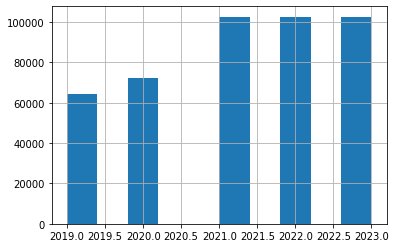

In [39]:
ipr_data_df['FY'].hist()

### 'Line'

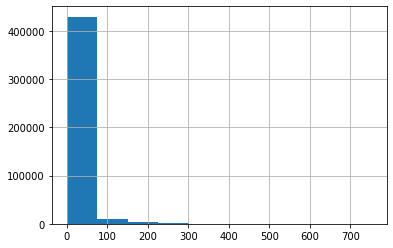

In [40]:
ipr_data_df['Line'].hist();

### 'MSRP'

In [41]:
ipr_data_df['MSRP'].describe()

count      443918
mean        26885
std        581003
min             0
25%           575
50%          1872
75%          6600
max     226976300
Name: MSRP, dtype: float64

Looking at MSRP descriptions we observe that most 75% of the produces have a price of about 7.5k, we'll use 10,000 as the cut-off to inspect distribution:

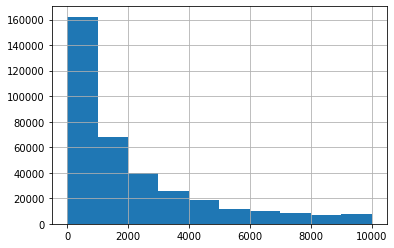

In [42]:
ipr_data_df[ipr_data_df['MSRP'] <= 10_000]['MSRP'].hist();

Distribution by Country

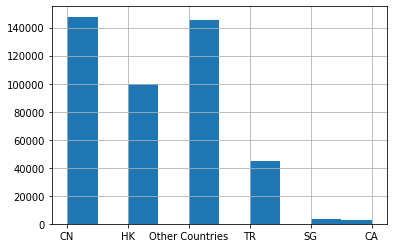

In [43]:
ipr_data_df['Trading Partner'].hist();

Distribution by Product

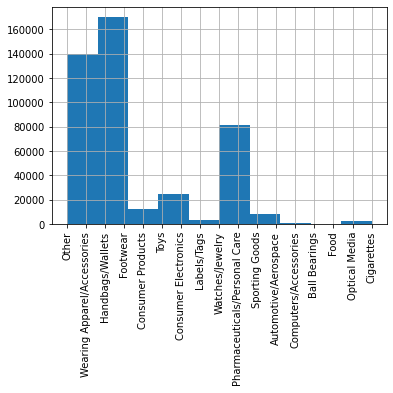

In [44]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
ipr_data_df['Product'].hist();


We observe that CA and SG many less observations compared to the rest

### Data Set Cleanup

We'll be performing the following actions before exploring feature selection

  1. Normalize column naming, that is remove special characters and replace with underscores, all columns names in lowercase.
  2. Removing features with 20% or more missing values
  3. Imputing the average for features with less than 20% missing values
  4. Normalize string values
  5. Remove columns that might not be of interest
     1. `centers_of_excellence` - Typically the 
     2. `mode_of_transportation` - We don't have an equivalent on the product list for this column
  6. We'll create a new column called `line_count` which contains the total number of lines
  7. We'll merge the `line` and `unique_seizure_id` into a true single identifier
  8. Finally we'll drop duplicate `unique_seizure_id`-`line` values

In [45]:
ipr_data_df.head()

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
0,2022,CN,Other,Consumer Products & Mass Merchandising,Other,202201000001,1,49314
1,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,1,45391
2,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,2,9754
3,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000003,1,30800
4,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000004,1,2840


In [46]:
from etl_ipr_data import transform

ipr_data_processed_df = transform(ipr_data_df)

print("Features:")
print("\n".join(ipr_data_processed_df.columns))

ipr_data_processed_df.head()

remove_columns_missing: set()
join_columns: unique_seizure_id_line


Features:
msrp
trading_partner_cn
trading_partner_hk
trading_partner_other_countries
trading_partner_sg
trading_partner_tr
product_ball_bearings
product_cigarettes
product_computers_accessories
product_consumer_electronics
product_consumer_products
product_food
product_footwear
product_handbags_wallets
product_labels_tags
product_optical_media
product_other
product_pharmaceuticals_personal_care
product_sporting_goods
product_toys
product_watches_jewelry
product_wearing_apparel_accessories
line_count


,msrp,trading_partner_cn,trading_partner_hk,trading_partner_other_countries,trading_partner_sg,trading_partner_tr,product_ball_bearings,product_cigarettes,product_computers_accessories,product_consumer_electronics,product_consumer_products,product_food,product_footwear,product_handbags_wallets,product_labels_tags,product_optical_media,product_other,product_pharmaceuticals_personal_care,product_sporting_goods,product_toys,product_watches_jewelry,product_wearing_apparel_accessories,line_count
0,49314,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,45391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,9754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
3,30800,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2840,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4


Finally, we'll add a constant column which is the target class of the column:

In [47]:
ipr_data_processed_df['seized'] = 1.0

In [48]:
ipr_data_processed_df.head()

,msrp,trading_partner_cn,trading_partner_hk,trading_partner_other_countries,trading_partner_sg,trading_partner_tr,product_ball_bearings,product_cigarettes,product_computers_accessories,product_consumer_electronics,product_consumer_products,product_food,product_footwear,product_handbags_wallets,product_labels_tags,product_optical_media,product_other,product_pharmaceuticals_personal_care,product_sporting_goods,product_toys,product_watches_jewelry,product_wearing_apparel_accessories,line_count,seized
0,49314,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,45391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
2,9754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
3,30800,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,2840,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1


## Feature selection

First the total number of features:

In [49]:
print(len(ipr_data_processed_df.columns))
print("\n".join(ipr_data_processed_df.columns))

24
msrp
trading_partner_cn
trading_partner_hk
trading_partner_other_countries
trading_partner_sg
trading_partner_tr
product_ball_bearings
product_cigarettes
product_computers_accessories
product_consumer_electronics
product_consumer_products
product_food
product_footwear
product_handbags_wallets
product_labels_tags
product_optical_media
product_other
product_pharmaceuticals_personal_care
product_sporting_goods
product_toys
product_watches_jewelry
product_wearing_apparel_accessories
line_count
seized


In [50]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

N_FEATURES = len(ipr_data_processed_df.columns)
X = ipr_data_processed_df[ipr_data_processed_df.columns.difference(['seized'])]
y = ipr_data_processed_df['seized']

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=N_FEATURES)
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=24)

In [51]:
features = []
for i in range(X.shape[1]):
    if not rfe.support_[i]:
        continue
    features.append({'index': i, 'feature_name': X.columns[i], 'rank': rfe.ranking_[i]})

features_df = pd.DataFrame(features, columns=['index', 'feature_name', 'rank'])
features_df

,index,feature_name,rank
0,0,line_count,1
1,1,msrp,1
2,2,product_ball_bearings,1
3,3,product_cigarettes,1
4,4,product_computers_accessories,1
5,5,product_consumer_electronics,1
6,6,product_consumer_products,1
7,7,product_food,1
8,8,product_footwear,1
9,9,product_handbags_wallets,1


From looking at the results it seems that all features are ranked equally; this may be because the categorical product features indicate a direct seizure on our data set. 

Since we're mostly interested in country and our full product list is all of the same category, we'll remove all `product_` features and try another feature extractor.

In [52]:
ipr_data_processed_df.drop(columns=[c for c in ipr_data_processed_df.columns if c.startswith("product_")], inplace=True)
ipr_data_processed_df

,msrp,trading_partner_cn,trading_partner_hk,trading_partner_other_countries,trading_partner_sg,trading_partner_tr,line_count,seized
0,49314,1,0,0,0,0,1,1
1,45391,1,0,0,0,0,2,1
2,9754,1,0,0,0,0,2,1
3,30800,0,1,0,0,0,1,1
4,2840,0,1,0,0,0,4,1
...,...,...,...,...,...,...,...,...
444108,6980,0,1,0,0,0,3,1
444109,780,0,1,0,0,0,3,1
444110,11130,0,1,0,0,0,1,1
444111,1927,0,1,0,0,0,2,1


In [53]:
from feature_util import create_rfe_df
features_no_product_df = create_rfe_df(ipr_data_processed_df, 9, 'seized')
features_no_product_df

,index,feature_name,rank
0,0,line_count,1
1,1,msrp,1
2,2,trading_partner_cn,1
3,3,trading_partner_hk,1
4,4,trading_partner_other_countries,1
5,5,trading_partner_sg,1
6,6,trading_partner_tr,1


Looking at the results it seems like removing `product_` yields no difference in feature selection.

## Model Training

First since all features seem to have the same ranking we'll proceed to train our model; first we'll split our data set in training, we'll use the following splits for our data:

  * Training: 70%
  * Cross-Validation: 15%
  * Testing: 15%

In [54]:
from sklearn.model_selection import train_test_split

y_name = "seized"
X_train, X_test, y_train, y_test = train_test_split(
    ipr_data_processed_df[ipr_data_processed_df.columns.difference([y_name])],
    ipr_data_processed_df[y_name],
    test_size=0.3,
    random_state=42,
)

X_test, X_cv, y_test, y_cv = train_test_split(
    X_test, y_test, test_size=0.5, random_state=21
)

In [55]:
print("Total:", len(ipr_data_processed_df))
print("-----")
print("Train:", len(X_train), len(y_train))
print("Test:", len(X_test), len(y_test))
print("CV:", len(X_cv), len(y_cv))

Total: 444113
-----
Train: 310879 310879
Test: 66617 66617
CV: 66617 66617


In [56]:
from feature_util import write_split

write_split(X_train, y_train, ipr_data_processed_df.columns, 'ipr_data_processed_train.csv')
write_split(X_test, y_test, ipr_data_processed_df.columns, 'ipr_data_processed_test.csv')
write_split(X_cv, y_cv, ipr_data_processed_df.columns, 'ipr_data_processed_cv.csv')

        line_count  msrp  ...  trading_partner_sg  trading_partner_tr
165092           3  1550  ...                   0                   0
5400             9  2300  ...                   0                   0
361631           8  2190  ...                   0                   0
161397          94  2000  ...                   0                   0
30555            2  1550  ...                   0                   1
...            ...   ...  ...                 ...                 ...
259178          11 11840  ...                   0                   0
365838          11  1700  ...                   0                   0
131932           4  8000  ...                   0                   0
146867           7   900  ...                   0                   0
121958           8  1350  ...                   0                   0

[310879 rows x 7 columns] 165092   1 
5400     1 
361631   1 
161397   1 
30555    1 
         ..
259178   1 
365838   1 
131932   1 
146867   1 
121958   1 
N

,msrp,trading_partner_cn,trading_partner_hk,trading_partner_other_countries,trading_partner_sg,trading_partner_tr,line_count,seized
407805,3898,1,0,0,0,0,277,1
413011,15,0,1,0,0,0,10,1
207877,8400,0,0,0,0,1,25,1
243055,299000,0,1,0,0,0,1,1
130540,815,0,1,0,0,0,7,1
...,...,...,...,...,...,...,...,...
15570,39000,1,0,0,0,0,12,1
233164,1000,0,1,0,0,0,4,1
287962,2800,1,0,0,0,0,38,1
331901,4830,1,0,0,0,0,8,1


## Model Training

With the data sets split for training and validation data sets we can now proceed to train our model. Since our dataset is biased toward a single class we'll be training a `OneClassClassifier` model.

In [57]:
from feature_util import fit_and_save
from sklearn.svm import OneClassSVM

model = OneClassSVM(gamma='auto')

fit_and_save(model, X_train, 'ipr_model')

OneClassSVM(gamma='auto')